## Chapter 2

### Supervised Learning
- Involves training the model with labeled data. The model attempts to find the mapping between the input (features) X and output (label, target) Y.
- The model then attemps to predict or classify on unseen data.

#### Objectives of supervised learning
- Accuratly predict on unseen test cases.
- Understand which inputs affects the output and how.
- Assess the quality of our predictions.

### Unsupervised Learning
- Involes training the model with unlabeled data. The model attemps to find patterns and relationships in the data. There is no output Y.
- The model then attemps to cluster unseen data based on similarity with the training data.

### Regression function
f(x) = E(Y | X = x)

- Typically we have few/no data points for all x, so we cannot compute E(Y | X = x)
- E[^f(x)]: Average prediction you’d get if you trained your model on many different datasets drawn from the same population


![](../images/regression1.png)

- What we can do is relax the definition and let ^f(x) = Average(Y | X in Neightbour(x))
- we take some of the neighbours of x

Nearest neighbour (NN) average can be pretty good for small number of features (p) and large number of data points.
NN can be lousy when p is large: Curse of dimensionality.

We can instead use linear model, although it is almost never correct. It gives a reasionable fit.


#### Trade Offs

- Prediciton accuracy vs interpretability

- Good fit vs Over fit vs Under fit

- Parsimoney values vs black-box
  - simple models (fewer varibales) vs complex model

- E[(Y−f^​(X))2]=[Bias(f^​(X))]2​​+Var(f^​(X))​​+σ2​​
- Total test error = Bias² + Variance + Irreducible Error (σ²)


#### Error term 
- ε is the error term
  - This is the irreducible noise in the data
  - The quantity ε may contain unmeasured variables that are useful in predicting Y, it may also contain unmeasurable variation.
- Var(ε) = σ²
- σ² (error term variance) sets the lower limit on how well any model can predict Y.
- Y=f(X)+ε
  - Where:
    - Y: response (dependent variable) ( observed value)
    - X: predictors (independent variables)
    - f(X): true underlying relationship
    - ε (error term): random noise capturing everything not explained by f(X)
- Assumptions about ε (in linear regression)
  - E(ε) = 0
  - σ² = Var(ε) is constant
  - it is normally distributed
- 



### Assessing Model Accuray

- MSE: 
  - = 1/n * sum from i=1 to n (yi - ^f(xi))^2
  - penalises outliers more (bias towards overfit function)
  - Used in gradient descent to optimise the model
  - Not very interpretable, say you are prediciting house prices, MSE units will be dollars squared which is not meaningful.

- MAE
  - = 1/n * sum from i=1 to n (|yi - ^f(xi)|)
  - more interpretable as units are the same as your data
  - less sensitive to outliers

### Bias-Variance Trade-off

- Bias: The error made due to the underlying assumption. (Bias is an error from a model's oversimplified assumptions, causing it to consistently miss the "true" values (underfitting))
  - Bias(^Y)=E(^Y)−Y

- Variance: How sensitive the model is to change in training data. (Variance refers to the amount by which fˆ would change if we
estimated it using a different training data set.) (High variance = Overfitting)
  - Variance=E[(^Y−E[^Y])^2]

- Flexibilty: Number of parameters of the model.
  - As flexibilty increases, the complexity increases but interpretability decreases.


Typically as flexibilty of model increases, the variance increases and bias decreases. Choosing the flexibilty based on average test error is the bias-variance trade-off.

### Classificaiton Setting

- What is the label is not quantitative, what is it is qualitative.
- We can calculate the error rate by: (1/n) * sum of i=1 to n (I(yi != ^yi))
  - we would calculate how many of the predicted labels are not the same as the actual labels.


#### Bayes Classifier

- Bayes Classifier is a theoretical model that gives the lowest possible error rate for any classification problem. - It's the gold standard that classifiers try to approximate.
- P(Y=k∣X=x)= (P(X=x∣Y=k)P(Y=k)​) / P(X=x)

-----------------------


## Lab 


In [69]:
import numpy as np

x = [3, 4, 5]
y = [4, 9, 7]
x+y

[3, 4, 5, 4, 9, 7]

In [70]:
x = np.array([3, 4, 5])
y = np.array([4, 9, 7])
x+y

array([ 7, 13, 12])

##### A 2D np.array must have the same number of elements in each row (i.e., each “inner” array must be the same length). This is the reason for np's speed and shape benefits.

In [71]:
x = np.array([[1, 2, 8], [3, 4, 5]])
x.dtype, x.ndim, x.shape, x.size 

(dtype('int64'), 2, (2, 3), 6)

In [72]:
x = np.array([1, 2, 3, 4]) 
x.sum(), np.sum(x)

(np.int64(10), np.int64(10))

In [73]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
print("before reshaping:", x)
x = x.reshape((5,2))
print("after reshaping:", x)



before reshaping: [ 1  2  3  4  5  6  7  8  9 10]
after reshaping: [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [74]:
tuple_1 = (1, 2, 3)
tuple_1[0] = 0 # This will raise a TypeError because tuples are immutable


TypeError: 'tuple' object does not support item assignment

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
x = x.reshape((5,2))
x.T

array([[ 1,  3,  5,  7,  9],
       [ 2,  4,  6,  8, 10]])

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
x.mean(), np.square(x), x**2, np.sqrt(x)

(np.float64(5.5),
 array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100]),
 array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100]),
 array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798,
        2.44948974, 2.64575131, 2.82842712, 3.        , 3.16227766]))

##### np.random.normal has parameters: loc, scale and size
- loc: mean
- scale: standard deviation
- size: number of random values you want

In [ ]:
x = np.random.normal(loc = 2, scale = 3, size=10)
x

array([-5.32185623,  2.65701764,  1.37495001,  4.48524769,  3.18241032,
        3.83903945,  4.19938496,  1.92330962,  9.31059226,  1.79653105])

In [ ]:
rng = np.random.default_rng(1303) 
print(rng.normal(scale=5, size=2)) 
rng2 = np.random.default_rng(1303) 
print(rng2.normal(scale=5, size=2))

[ 4.09482632 -1.07485605]
[ 4.09482632 -1.07485605]


In [81]:
rng = np.random.default_rng(42)
x = rng.standard_normal((2,3))
print(x)
x.mean(1), x.mean(1)

[[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]]


(array([ 0.00506139, -0.77088333]), array([ 0.00506139, -0.77088333]))

### Graphs

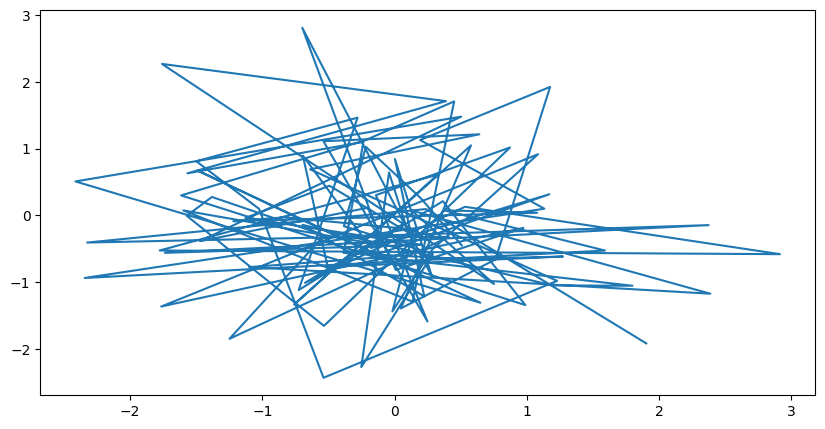

In [91]:
from matplotlib.pyplot import subplots 
fig, ax = subplots(figsize=(10, 5))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y)

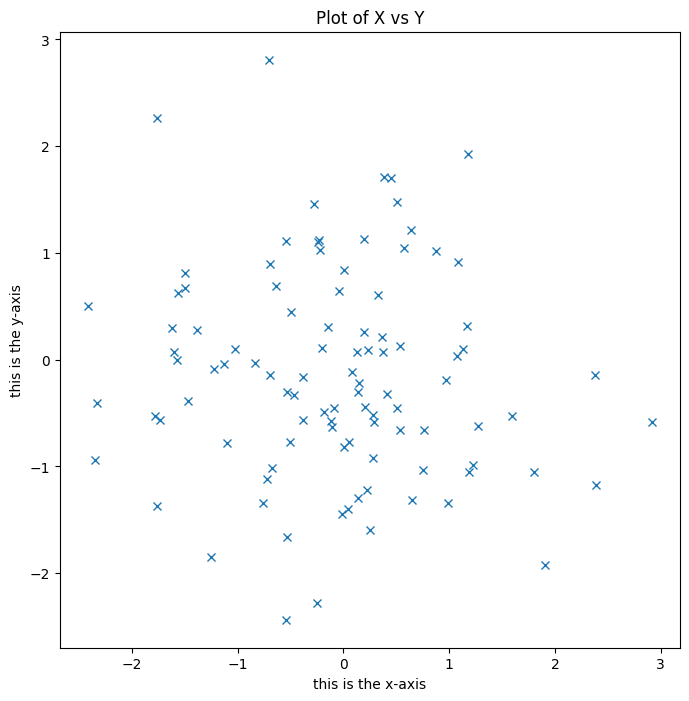

In [100]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'x')
ax.set_xlabel("this is the x-axis") 
ax.set_ylabel("this is the y-axis") 
ax.set_title("Plot of X vs Y");

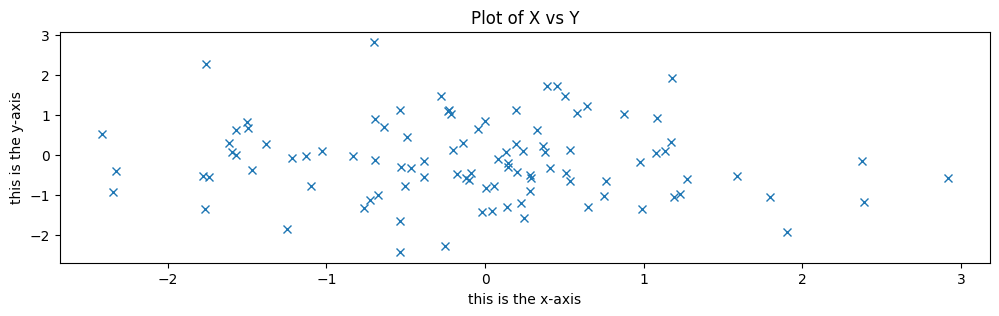

In [101]:
fig.set_size_inches(12,3)
fig

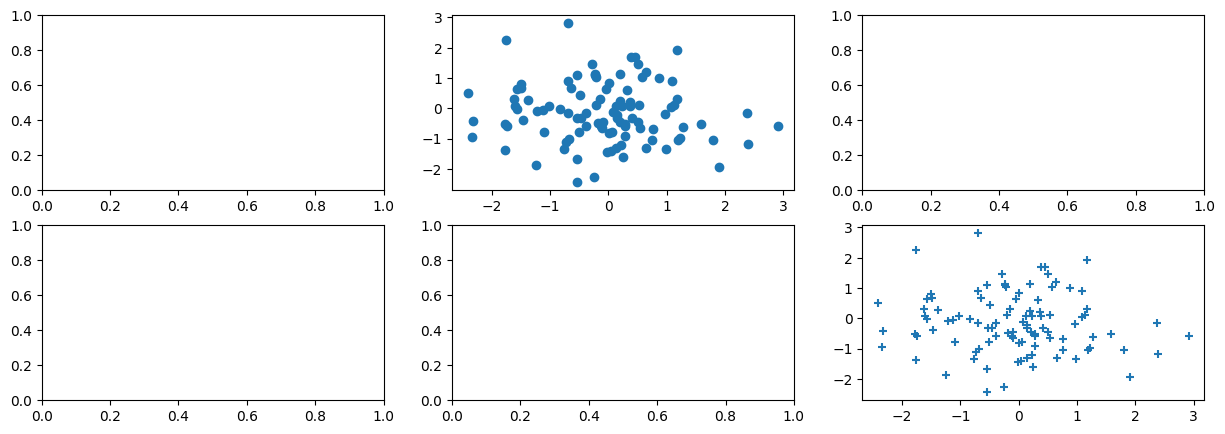

In [106]:
fig, axes = subplots(nrows=2, ncols=3,figsize=(15, 5))
axes[0,1].plot(x, y, 'o') 
axes[1,2].scatter(x, y, marker='+')

In [107]:
fig.savefig("Figure.png", dpi=400)

In [117]:
seq = np.linspace(0,10,11)
seq

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [118]:
seq2 = np.arange(0,10)
seq2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [121]:
a = np.array(np.arange(12)).reshape(3,4)
a[[1,2], [0,3]]  # Accessing elements at (1,0) and (2,3)

array([ 4, 11])

In [126]:
x = np.zeros((3,4), bool)
x[0][0] = True

np.all(x == True), np.any(x == True)

(np.False_, np.True_)

In [153]:
import pandas as pd
auto = pd.read_csv("../data/Auto.csv")
print(auto.columns)
auto.head(6)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [154]:
auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
387     86
388     52
389     84
390     79
391     82
Name: horsepower, Length: 392, dtype: int64

In [155]:
np.unique(auto['horsepower'])

array([ 46,  48,  49,  52,  53,  54,  58,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98, 100, 102, 103, 105, 107, 108, 110,
       112, 113, 115, 116, 120, 122, 125, 129, 130, 132, 133, 135, 137,
       138, 139, 140, 142, 145, 148, 149, 150, 152, 153, 155, 158, 160,
       165, 167, 170, 175, 180, 190, 193, 198, 200, 208, 210, 215, 220,
       225, 230])

In [156]:
auto.shape

(392, 9)

In [159]:
idx_80 = auto['year'] > 81
auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
362,28.0,4,112.0,88,2605,19.6,82,1,chevrolet cavalier
363,27.0,4,112.0,88,2640,18.6,82,1,chevrolet cavalier wagon
364,34.0,4,112.0,88,2395,18.0,82,1,chevrolet cavalier 2-door
365,31.0,4,112.0,85,2575,16.2,82,1,pontiac j2000 se hatchback
366,29.0,4,135.0,84,2525,16.0,82,1,dodge aries se
367,27.0,4,151.0,90,2735,18.0,82,1,pontiac phoenix
368,24.0,4,140.0,92,2865,16.4,82,1,ford fairmont futura
369,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l
370,37.0,4,91.0,68,2025,18.2,82,3,mazda glc custom l
371,31.0,4,91.0,68,1970,17.6,82,3,mazda glc custom


In [169]:
Auto_re = auto.set_index('name') 
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [170]:
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


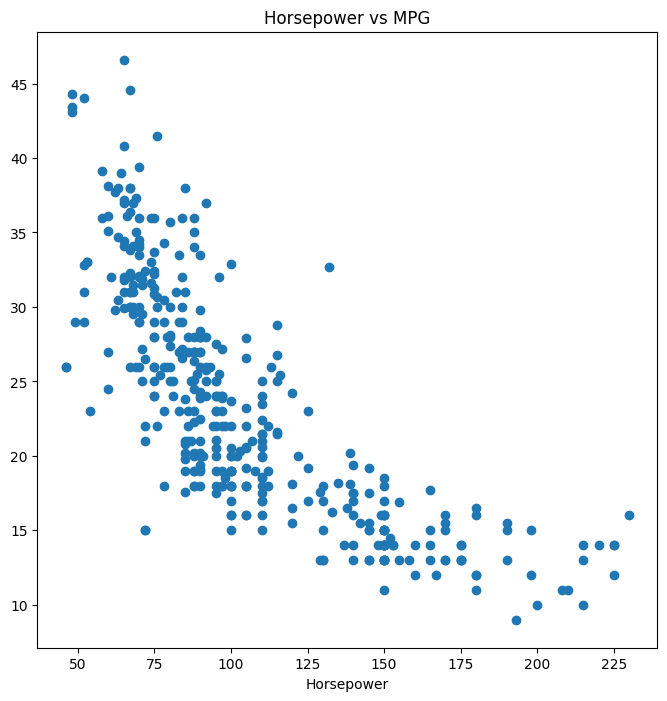

In [177]:
horsepower = auto['horsepower']
mpg = auto['mpg']
fig, ax = subplots(figsize=(8, 8))
ax.plot(horsepower, mpg, 'o');
ax.set_xlabel('Horsepower')
ax.set_title('Horsepower vs MPG');

In [178]:
auto.cylinders = pd.Series(auto.cylinders, dtype='category')
auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

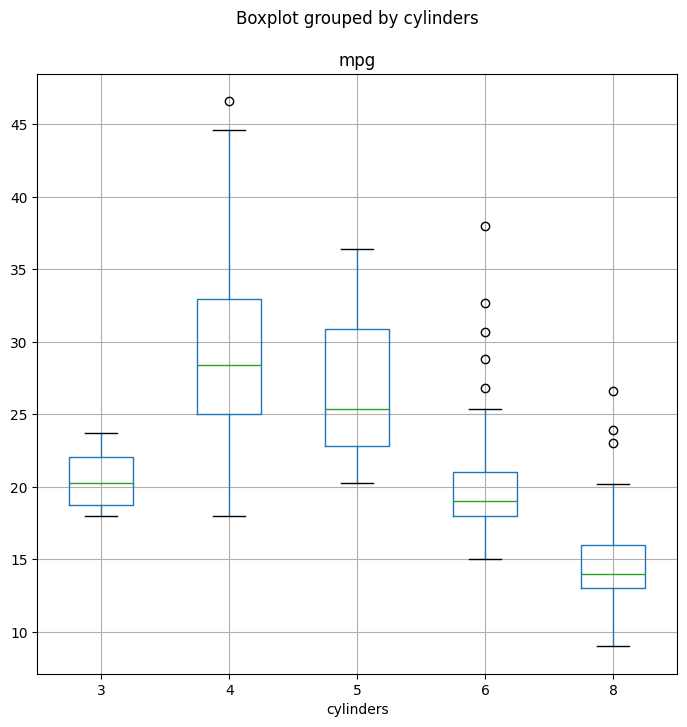

In [179]:
fig, ax = subplots(figsize=(8, 8))
auto.boxplot('mpg', by='cylinders', ax=ax);

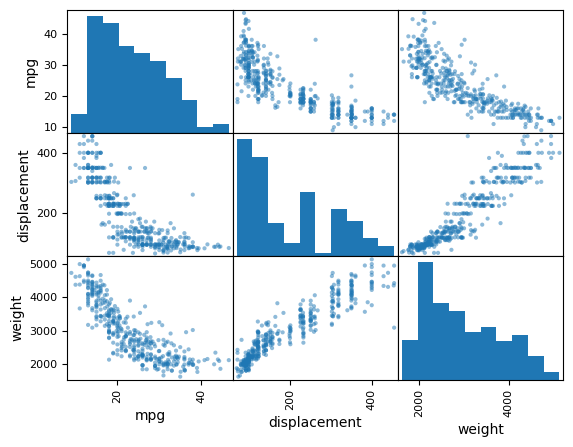

In [180]:
pd.plotting.scatter_matrix(auto[['mpg',
                                 'displacement',
                                 'weight']]);

In [181]:
auto[['mpg', 'weight']].describe()

,mpg,weight
count,392.000000,392.000000
mean,23.445918,2977.584184
std,7.805007,849.402560
min,9.000000,1613.000000
25%,17.000000,2225.250000
50%,22.750000,2803.500000
75%,29.000000,3614.750000
max,46.600000,5140.000000


-----
## Exercises 

1a. The sample size n is extremely large, and the number of predictors p is small.
  - Flexible model would be better as there are a lot of samples meaning less likely to fit the noise. 

1b. The number of predictors p is extremely large, and the number of observations n is small.
  - Inflexible model would be better as there are not many observations.
  - It is very likely that when the number of predictors is high and observations is small, a flexible model would fit the noise (overfit).

1c. The relationship between the predictors and response is highly non-linear.
  - Flexible model would be better to capture the complex relationship
  
1d. The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
  - Since the variance is extremely high, a more flexible model will fit the noise more and likely overfit.